## Анализ поведения пользователей в приложении компании

### Описание проекта - основная задача

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения.

Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

### План проекта

[ШАГ 1 Загрузить файл](#step1)  
- Импортировать файлы с исходными данными

[ШАГ 2 Подготовить данные](#step2)  
- Замените названия столбцов на удобные для вас;
- Проверьте пропуски и типы данных. Откорректируйте, если нужно;
- Добавьте столбец даты и времени, а также отдельный столбец дат;

[Шаг 3 Изучите и проверьте данные](#step3)  
- Сколько всего событий в логе?
- Сколько всего пользователей в логе?
- Сколько в среднем событий приходится на пользователя?
- Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные
- Много ли событий и пользователей вы потеряли, отбросив старые данные?
- Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп

[Шаг 4 Изучите воронку событий](#step4)  
- Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
- Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
- Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
- По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
- На каком шаге теряете больше всего пользователей?
- Какая доля пользователей доходит от первого события до оплаты?

[Шаг 5. Изучите результаты эксперимента](#step5)  
- Сколько пользователей в каждой экспериментальной группе?
- Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
- Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
- Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
- Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.


### Шаг 1. Открываем файл с данными и изучаем общую информацию <a id="step1"></a>  

In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from scipy import stats as st
from scipy.stats import levene
import warnings
warnings.filterwarnings('ignore')

experiment_log = pd.read_csv('/datasets/logs_exp.csv', delimiter='\t')

display(experiment_log.head())
print('Описание данных', experiment_log.describe()) # изучение датасета с помощью метода describe
display(experiment_log.info()) # проверим типы данных и посмотрим наличие пропущенных значений
print ('Дубликатов в данных:', experiment_log.duplicated().sum())
#display(experiment_log[experiment_log.number == 0])

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Описание данных        DeviceIDHash  EventTimestamp          ExpId
count  2.441260e+05    2.441260e+05  244126.000000
mean   4.627568e+18    1.564914e+09     247.022296
std    2.642425e+18    1.771343e+05       0.824434
min    6.888747e+15    1.564030e+09     246.000000
25%    2.372212e+18    1.564757e+09     246.000000
50%    4.623192e+18    1.564919e+09     247.000000
75%    6.932517e+18    1.565075e+09     248.000000
max    9.222603e+18    1.565213e+09     248.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


None

Дубликатов в данных: 413


### Вывод

- Требуется переименовать столбцы
- Пропусков нет
- Заменить тип данных для столбца со временем
- Добавить столбец даты и времени, и отдельный столбец даты
- Проанализировать причину дубликатов и принять решение о их удалении

### ШАГ 2 Подготовить данные <a id="step2"></a>  

In [3]:
experiment_log.rename(columns={'EventName': 'name', 'DeviceIDHash': 'user_id', 'EventTimestamp': 'time', 'ExpId': 'exp_id'}, inplace=True)

experiment_log['time'] = pd.to_datetime(experiment_log['time'], unit='s')
experiment_log['date'] = experiment_log['time'].astype('datetime64[D]')
display(experiment_log.head()) #проверка корректности изменений
duplicate = experiment_log[experiment_log.duplicated()] #датафрейм дубликатов
display(duplicate.sort_values('user_id').head(20))

,name,user_id,time,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


,name,user_id,time,exp_id,date
130558,MainScreenAppear,33176906322804559,2019-08-04 15:37:55,248,2019-08-04
130995,OffersScreenAppear,33176906322804559,2019-08-04 15:49:23,248,2019-08-04
104108,CartScreenAppear,34565258828294726,2019-08-03 18:33:41,248,2019-08-03
159302,PaymentScreenSuccessful,54903596035630984,2019-08-05 13:27:52,248,2019-08-05
176813,PaymentScreenSuccessful,77364241990273403,2019-08-05 22:38:52,246,2019-08-05
189896,MainScreenAppear,91292479590032512,2019-08-06 10:35:23,246,2019-08-06
155464,MainScreenAppear,95206628315371849,2019-08-05 11:48:44,247,2019-08-05
110479,MainScreenAppear,170935625628929269,2019-08-04 05:44:47,246,2019-08-04
34223,CartScreenAppear,197027893265565660,2019-08-01 18:35:44,246,2019-08-01
17037,CartScreenAppear,197027893265565660,2019-08-01 11:40:14,246,2019-08-01


### Вывод

- Переименовали столбцы
- Заменили тип данных для столбца со временем
- Добавили отдельный столбец даты
- Точную причину возникновения некоторых записей (дубликатов) не получилось определить, но так как дубликатов всего лишь 413 из 244126, и только часть из них полностью совпадает, то принял решение их оставить. 

### ШАГ 3 Изучите и проверьте данные <a id="step3"></a>  

In [4]:
user_cnt = experiment_log['user_id'].nunique()
print('Всего уникальных пользователей -',user_cnt)

Всего уникальных пользователей - 7551


In [5]:
print('Минимальная дата события -',experiment_log['date'].min())
print('Максимальная дата события -',experiment_log['date'].max())

Минимальная дата события - 2019-07-25 00:00:00
Максимальная дата события - 2019-08-07 00:00:00


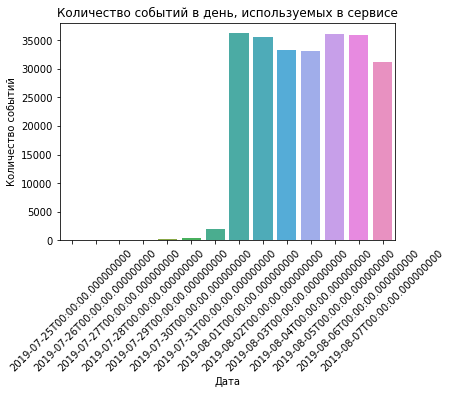

In [6]:
experiment_log['date'] 

experiment_log_sort = experiment_log.groupby(['date']).agg({'user_id': 'count'}).reset_index()

bar_plot = sns.barplot(x='date', y='user_id', data=experiment_log_sort)
plt.title('Количество событий в день, используемых в сервисе')
plt.ylabel('Количество событий')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.show()

In [7]:
date_min = pd.datetime(2019, 7, 31)
experiment_log_07_31 = experiment_log.query('date <= @date_min')
experiment_log_clear = experiment_log.query('date > @date_min')
user_list_07_31 = experiment_log_07_31['user_id'].unique()
user_list_clear = experiment_log_clear['user_id'].unique()
n = 0
for i in range(len(user_list_07_31)):
    if user_list_07_31[i] in user_list_clear:
        i = i+1
    else:
        n = n+1
        i = i+1

events_cnt_07_31 = experiment_log_07_31['name'].count()
print('Количество уникальных пользователей, которых уберем -',n)
print('Количество событий, которые уберем -',events_cnt_07_31)

Количество уникальных пользователей, которых уберем - 17
Количество событий, которые уберем - 2828


In [8]:
print('Количество уникальных пользователей для очищенного датасета',experiment_log_clear['user_id'].nunique())
print('Количество уникальных пользователей для исходного датасета',experiment_log['user_id'].nunique())

print('Количество уникальных пользователей, которых уберем =',\
      (experiment_log['user_id'].nunique() - experiment_log_clear['user_id'].nunique()))

Количество уникальных пользователей для очищенного датасета 7534
Количество уникальных пользователей для исходного датасета 7551
Количество уникальных пользователей, которых уберем = 17


In [9]:
display(experiment_log_clear['exp_id'].value_counts())

248    84726
246    79425
247    77147
Name: exp_id, dtype: int64

### Вывод

- Всего событий 244126
- Всего пользователей 7551
- В среднем на пользователя приходится 244126/7551 = 32 события
- Располгаем данным с 2019-07-25 по 2019-08-07, но на самом деле корректно можно использовать данные с 2019-08-01 по 2019-08-07
- Отбросив часть данных, мы потеряем 0 пользователей и 2828 событий
- В каждой из трех экспериментальных групп есть события и пользователи

### ШАГ 4 Изучите воронку событий <a id="step4"></a>  

In [10]:
experiment_log_cnt = experiment_log_clear.groupby(['name'])['user_id'].count().reset_index().sort_values(by='user_id',ascending=False)
display(experiment_log_cnt)

,name,user_id
1,MainScreenAppear,117431
2,OffersScreenAppear,46350
0,CartScreenAppear,42365
3,PaymentScreenSuccessful,34113
4,Tutorial,1039


In [11]:
experiment_log_user_cnt = experiment_log_clear.groupby(['name'])['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)
experiment_log_user_cnt['frequency'] = experiment_log_user_cnt['user_id']/(7551)
display(experiment_log_user_cnt)

,name,user_id,frequency
1,MainScreenAppear,7419,0.982519
2,OffersScreenAppear,4593,0.608264
0,CartScreenAppear,3734,0.494504
3,PaymentScreenSuccessful,3539,0.468680
4,Tutorial,840,0.111244


In [12]:
experiment_log_user_cnt.reset_index(drop=True, inplace=True)
for row in range(len(experiment_log_user_cnt)):
    row1 = row+1
    experiment_log_user_cnt.loc[row1, 'prv_step'] = experiment_log_user_cnt.loc[row, 'user_id']
    
experiment_log_user_cnt.drop([5], inplace=True) # удаляем 5 и 6 строки
display(experiment_log_user_cnt)

,name,user_id,frequency,prv_step
0,MainScreenAppear,7419.0,0.982519,NaN
1,OffersScreenAppear,4593.0,0.608264,7419.0
2,CartScreenAppear,3734.0,0.494504,4593.0
3,PaymentScreenSuccessful,3539.0,0.468680,3734.0
4,Tutorial,840.0,0.111244,3539.0


In [13]:
experiment_log_user_cnt['step_frequency'] = experiment_log_user_cnt['user_id'] / experiment_log_user_cnt['prv_step']
display(experiment_log_user_cnt)

,name,user_id,frequency,prv_step,step_frequency
0,MainScreenAppear,7419.0,0.982519,NaN,NaN
1,OffersScreenAppear,4593.0,0.608264,7419.0,0.619086
2,CartScreenAppear,3734.0,0.494504,4593.0,0.812976
3,PaymentScreenSuccessful,3539.0,0.468680,3734.0,0.947777
4,Tutorial,840.0,0.111244,3539.0,0.237355


In [16]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = experiment_log_user_cnt['name'],
    x = experiment_log_user_cnt['user_id']))

fig.show()

### Вывод

- Все события выстраиваются в логическую цепочку. Но данная цепочка не обязательно должна быть только такой, например мы видим, что количество уникальных пользователей для события MainScreenAppear - 7419 меньше, чем всего уникальных пользователей - 7551. Это значит, что не все существующие пользователи прошли данное событие.
- Больше всего пользователей теряется на этапе просмотра итогов оплаты, переход с PaymentScreenSuccessful на Tutorial, а именно 76,3% пользователей.
- До стадии оплаты доходит 3539 пользователей, а это 3539/7551 = 46,8% от общего числа пользователей.

### Шаг 5. Изучите результаты эксперимента <a id="step5"></a>  

In [14]:
experiment_log_246 = experiment_log.query('exp_id == 246')
experiment_log_247 = experiment_log.query('exp_id == 247')
experiment_log_248 = experiment_log.query('exp_id == 248')

user_cnt_246 = experiment_log_246['user_id'].nunique()
print('В первой контрольной группе (246) -', user_cnt_246, 'пользователей')
print('')
user_cnt_247 = experiment_log_247['user_id'].nunique()
print('Во второй контрольной группе (247) -', user_cnt_247, 'пользователей')
print('')
user_cnt_248 = experiment_log_248['user_id'].nunique()
print('В экспериментальной группе (248) - ', user_cnt_248, 'пользователей')

В первой контрольной группе (246) - 2489 пользователей

Во второй контрольной группе (247) - 2520 пользователей

В экспериментальной группе (248) -  2542 пользователей


In [15]:
experiment_log_246_cnt = experiment_log_246.groupby(['name'])['user_id'].nunique().reset_index()\
.sort_values(by='user_id',ascending=False)
display(experiment_log_246_cnt)

,name,user_id
1,MainScreenAppear,2456
2,OffersScreenAppear,1545
0,CartScreenAppear,1270
3,PaymentScreenSuccessful,1202
4,Tutorial,279


In [16]:
experiment_log_247_cnt = experiment_log_247.groupby(['name'])['user_id'].nunique().reset_index()\
.sort_values(by='user_id',ascending=False)
display(experiment_log_247_cnt)
print(experiment_log_246_cnt.loc[3, 'user_id'])

,name,user_id
1,MainScreenAppear,2482
2,OffersScreenAppear,1530
0,CartScreenAppear,1240
3,PaymentScreenSuccessful,1160
4,Tutorial,286


1202


Нулевая гипотеза - между рассматриваемыми группами 246 и 247 нет значимой разницы

Альтерантивная гипотеза - между рассматриваемыми группами 246 и 247 есть значимая разница

In [17]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([experiment_log_246_cnt.loc[3, 'user_id'], experiment_log_247_cnt.loc[3, 'user_id']])
trials = np.array([user_cnt_246, user_cnt_247])

p1 = successes[0]/trials[0]
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между группами есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными") 

p-значение:  0.10902546202332886
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными


In [18]:
experiment_log_248_cnt = experiment_log_248.groupby(['name'])['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)
display(experiment_log_248_cnt)

,name,user_id
1,MainScreenAppear,2501
2,OffersScreenAppear,1538
0,CartScreenAppear,1239
3,PaymentScreenSuccessful,1185
4,Tutorial,282


Так как, далее производим 4 вычисления, то следовательно исходный уровень alpha значимости мы делим на 4. Ниже в коде за это отвечает переменная bonferroni_alpha.

In [19]:
experiment_log_246_cnt = experiment_log_246_cnt.reset_index(drop=True)
experiment_log_247_cnt = experiment_log_247_cnt.reset_index(drop=True)

sample_A = experiment_log_246_cnt['user_id']
sample_B = experiment_log_247_cnt['user_id']

bonferroni_alpha = alpha / 4
for row in range(len(experiment_log_246_cnt)-1):
    print('Для события', experiment_log_246_cnt['name'][row+1])
    successes = np.array([sample_A[row+1], sample_B[row+1]])
    trials = np.array([user_cnt_246, user_cnt_247])

    p1 = successes[0]/trials[0]
    p2 = successes[1]/trials[1]


    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    difference = p1 - p2 
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)

    if (p_value < bonferroni_alpha):
        print("Отвергаем нулевую гипотезу: между группами есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    print('')

Для события OffersScreenAppear
p-значение:  0.3233225048227193
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Для события CartScreenAppear
p-значение:  0.19817540651836918
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Для события PaymentScreenSuccessful
p-значение:  0.10902546202332886
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Для события Tutorial
p-значение:  0.8756574258016974
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными



In [20]:
experiment_log_248_cnt.reset_index(drop=True, inplace=True)
sample_C = experiment_log_248_cnt['user_id']
bonferroni_alpha = alpha / 15 # получили 15, так как выполнили 15 тестов, cравнили по 5 событий в 3-х группах
def A_B(array, cnt, alpha):
    for row in range(len(array)):
        print('Для события', array['name'][row])
        successes = np.array([array['user_id'][row], sample_C[row]])
        trials = np.array([cnt, user_cnt_248])
        
        p1 = successes[0]/trials[0]
        p2 = successes[1]/trials[1]

        p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
        difference = p1 - p2 
        z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
        distr = st.norm(0, 1)  
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('p-значение: ', p_value)

        if (p_value < alpha):
            print("Отвергаем нулевую гипотезу: между группами есть значимая разница")
        else:
            print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
        print('')

In [21]:
print('Сравнение группы 246 с экспериментальной группой 248')
A_B(experiment_log_246_cnt, user_cnt_246, bonferroni_alpha)

Сравнение группы 246 с экспериментальной группой 248
Для события MainScreenAppear
p-значение:  0.39774960182882513
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Для события OffersScreenAppear
p-значение:  0.2531656758489338
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Для события CartScreenAppear
p-значение:  0.10534150642722295
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Для события PaymentScreenSuccessful
p-значение:  0.23403912852637143
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Для события Tutorial
p-значение:  0.8962914725257976
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными



In [22]:
print('Сравнение группы 247 с экспериментальной группой 248')
A_B(experiment_log_247_cnt, user_cnt_247, bonferroni_alpha)

Сравнение группы 247 с экспериментальной группой 248
Для события MainScreenAppear
p-значение:  0.7632160970326178
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Для события OffersScreenAppear
p-значение:  0.878057445632423
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Для события CartScreenAppear
p-значение:  0.7406094633808076
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Для события PaymentScreenSuccessful
p-значение:  0.6763830984465451
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Для события Tutorial
p-значение:  0.773300249936147
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными



In [23]:
print('Сравнение группы 246 и 247 с экспериментальной группой 248')
experiment_log_246_247_cnt = experiment_log_246_cnt
experiment_log_246_247_cnt['user_id'] = experiment_log_246_247_cnt['user_id'] + experiment_log_247_cnt['user_id']
user_cnt_246_247 = user_cnt_246 + user_cnt_247
A_B(experiment_log_246_247_cnt, user_cnt_246_247, bonferroni_alpha)

Сравнение группы 246 и 247 с экспериментальной группой 248
Для события MainScreenAppear
p-значение:  0.5067126962216841
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Для события OffersScreenAppear
p-значение:  0.4555404043137232
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Для события CartScreenAppear
p-значение:  0.2609811882648243
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Для события PaymentScreenSuccessful
p-значение:  0.6578429353593096
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Для события Tutorial
p-значение:  0.8086866211802637
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными



### Вывод

- После проверки групп А\А-эксперимента с помощью z-теста можно сказать, что между группами 246 и 247 нет значимой разницы
- Самое популярное событие во всех трех групп - это MainScreenAppear
- В группе 246 - 2456 из 2489, доля пользователей, выполневших событие MainScreenAppear - 98,6% 
- 247 - 2482 из 2520, доля пользователей - 98,5% 
- 248 - 2501 из 2542, доля пользователей - 98,4%
- Для события MainScreenAppear и других событий в группах 246 и 247 нет значимой разницы. Разбиение на группы корректное
- После сравнения экспериментальной группы 248 с группами 246, 247 и общей (246+247) можно сказать, что для всех событий во всех группах нет значимой разницы, нет основания считать группы разными
- Для првоедения эксперимента использовал Метод Бонферрони, и так как у меня было 15 экспериментов, то уровень статистической значимости использовал равным bonferroni_alpha = alpha / 15


### Общий вывод

- После изучения воронки продаж, можно сделать вывод, что самый популярный способ у пользователя совершить покупку - это последовательное выполненение следующих событий: MainScreenAppear - OffersScreenAppear - CartScreenAppear - PaymentScreenSuccessful - Tutorial
- До покупки доходят 46,8% от общего числа пользователей, а именно 3539 из 7551.
- При переходе к OffersScreenAppear отсеивается 32% пользователей
- Далее при переходе к CartScreenAppear отсеивается 19% пользователей
- И на этапе оплаты отсеивается всего лишь 15% пользователей
- Изучив две контрольные группы, сделали вывод, что в данных группах нет значимой разницы, следовательно тестирование проведено корректно
- Экспериментальная группа с новым шрифтом, не показала значимой разницы в сравнении с каждой контрольной группой. Поэтому можно сделать вывод, что изменение шрифта не приведет к существенным изменениям в использовании приложения клиентами компании.